## 📌 Understanding Missing Values

### 🔹 Types of Missing Values
- **Unknown**: Values not recorded or completely absent.  
- **Blank**: Fields intentionally left empty.  
- **Undefined**: Values that do not apply to a specific case or context.  

---

### 🔹 Three Main Types of Missing Data
1. **MCAR (Missing Completely at Random)**  
   - Missingness is entirely random and not related to any observed or unobserved data.  

2. **MAR (Missing at Random)**  
   - Missingness is related to observed data, but not to the missing values themselves.  

3. **MNAR (Missing Not at Random)**  
   - Missingness is related to the missing value itself, which can lead to bias.  

---

### 🔹 How Missing Values Affect Data Analysis
- **📉 Reduces Data Quality** → Incomplete datasets can produce unreliable conclusions.  
- **⚖️ Biases Results** → Patterns in missing data can skew interpretations.  
- **📊 Statistical Errors** → Many statistical methods assume complete data.  
- **🔻 Loss of Power** → Removing data decreases sample size and statistical power.  

---

### 🔹 Strategies for Handling Missing Values

#### 1. **Deletion**
- Remove rows or columns with missing values.  
- Be cautious—valuable data may be lost.  

#### 2. **Imputation**
- **Mean / Median / Mode** → Simple replacement for numeric or categorical data.  
- **Predictive Modeling** → Use algorithms to estimate missing values.  

#### 3. **Advanced Techniques**
- **Multiple Imputation** → Create several plausible datasets and combine results.  
- **K-Nearest Neighbors (KNN)** → Estimate values from nearest neighbors.  


**----------Define Missing values----------**

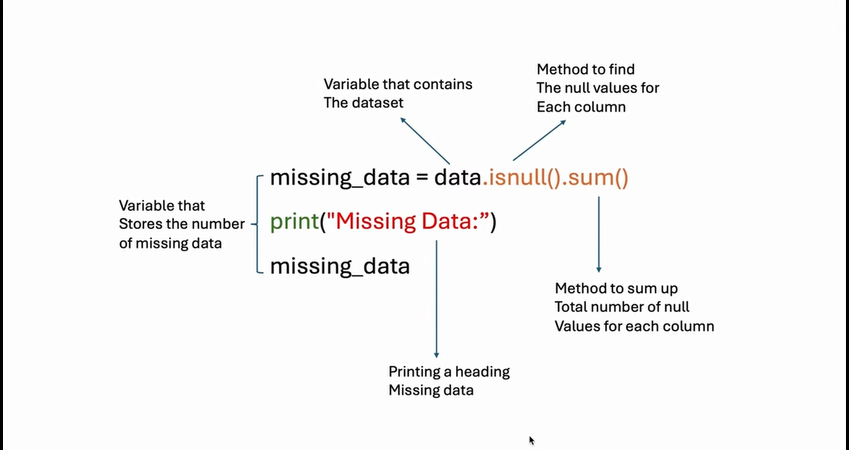

In [2]:
import pandas as pd
data = pd.read_excel('/content/customer_data.xlsx')
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [11]:
missing_data = data.isnull().sum()
print("missing data")
missing_data

missing data


,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


 **----------Imputing Missing Values----------**


## 🔹 Types of Imputation

1. **Deletion**  
   - ❌ Permanently removes data from the dataset.  
   - ⚠️ Can lead to loss of valuable information and reduced sample size.  

2. **Imputation**  
   - ✅ Preserves patterns and relationships within the data.  
   - 📊 Maintains dataset completeness for better analysis.  

3. **Real-World Data**  
   - 🌍 Rarely perfect; missing values are common in practice.  
   - 🎯 Effective imputation techniques are essential for accuracy.  

---

## 🔹 Types of Imputation Techniques

### 1️⃣ **Simple Imputation**

**Mean Imputation**  
- 🔄 Replace missing values with the **mean** of the available data in that column.  
- 📈 Best for **normally distributed numerical** data.  

**Median Imputation**  
- 🔄 Replace missing values with the **median** of the available data.  
- 🛡️ More robust to outliers — great for **skewed distributions**.  

**Mode Imputation**  
- 🔄 Replace missing values with the **mode** (most frequent value) in that column.  
- 🏷️ Best for **categorical** data where the most common category is a reasonable substitute.  


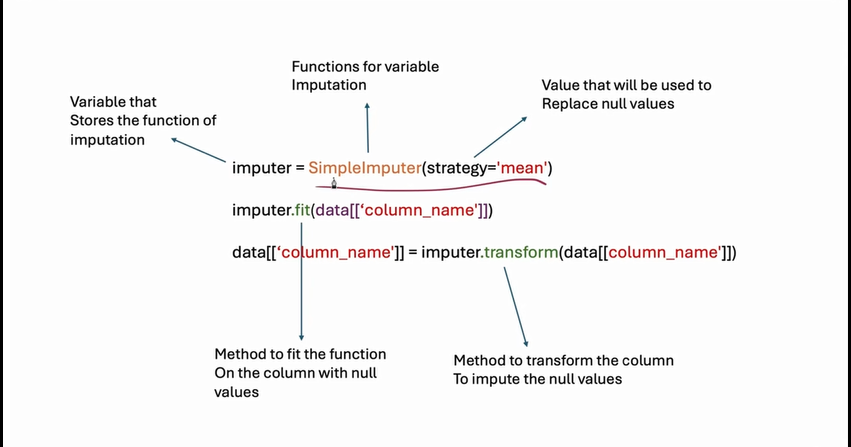

In [12]:
#impoert Library
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='median')
#numeric data - mean,median
#categorical data - most_frequent
imputer.fit(data[['Income']])
data[['Income']] = imputer.transform(data[['Income']])

In [18]:
imputer_2 = SimpleImputer(strategy='most_frequent')
#numeric data - mean,median
#categorical data - most_frequent
imputer_2.fit(data[['City']])
data[['City']] = imputer_2.transform(data[['City']])

In [19]:
missing_data = data.isnull().sum()
print("missing data")
missing_data

missing data


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [20]:
data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No
...,...,...,...,...,...,...,...,...,...,...,...,...
76,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes
79,C080,Female,26,43931.0,Los Angeles,Northeast,9,9.153600e+01,2,In-store,2023-09-18,No
